In [115]:
!ls ./matchesPlayed/

hopeful_play.csv  hopeful_play_cuts.csv


In [116]:
%matplotlib inline

In [117]:
import pandas as pd

In [118]:
PLAYER_PATH = "./matchesPlayed/hopeful_play.csv"

In [119]:
df = pd.read_csv(PLAYER_PATH, delimiter=',',encoding='utf-8', skip_blank_lines=True)

In [120]:
df.describe()

,Guess 1,Guess 2,Guess 3,Guess 4,Guess 5,Guess 6,Guess 7,Guess 8,Guess 9,Guess 10,PASSWORD
count,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296,1296
unique,14,111,490,910,896,613,349,210,152,8,1296
top,AEFE01,BABC11,AEAA10,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,FABF
freq,276,53,36,88,329,662,940,1082,1141,1175,1


In [121]:
df.head()

,Guess 1,Guess 2,Guess 3,Guess 4,Guess 5,Guess 6,Guess 7,Guess 8,Guess 9,Guess 10,PASSWORD
0,AEFE10,ABBD10,CEBC00,ADDA20,AFFA20,AAAA40,<pad>,<pad>,<pad>,<pad>,AAAA
1,AEFE10,ABBD11,BEBC01,DDAE10,DBFF01,CCAF10,ADAB30,ADAB30,ADAB30,XXXX,AAAB
2,AEFE10,ABBD10,CEBC10,CFFD01,AEAF20,AEAD20,AEBF10,ACAA22,AAAC40,<pad>,AAAC
3,AEFE10,ABBD20,ABCC10,AAAD40,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,AAAD
4,AEFE20,AEBB11,BEFF01,AAAE40,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,AAAE


-----------
*Match vinti in un colpo*

In [122]:
df[df['Guess 2']=='<pad>']

,Guess 1,Guess 2,Guess 3,Guess 4,Guess 5,Guess 6,Guess 7,Guess 8,Guess 9,Guess 10,PASSWORD
178,AEFE40,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,AEFE


In [123]:
df_lost = df[df['Guess 10'] == 'XXXX']
'match lost: {}'.format(len(df_lost))

'match lost: 115'

In [125]:
features_name = ['Guess 1', 'Guess 2', 'Guess 3', 'Guess 4', 'Guess 5',
              'Guess 6', 'Guess 7', 'Guess 8', 'Guess 9', 'Guess 10']

target_name = 'PASSWORD'

In [126]:
df_won = df[df['Guess 10'] != 'XXXX']
'Match won: {}'.format(len(df_won))

'Match won: 1181'

In [127]:
df.head()

,Guess 1,Guess 2,Guess 3,Guess 4,Guess 5,Guess 6,Guess 7,Guess 8,Guess 9,Guess 10,PASSWORD
0,AEFE10,ABBD10,CEBC00,ADDA20,AFFA20,AAAA40,<pad>,<pad>,<pad>,<pad>,AAAA
1,AEFE10,ABBD11,BEBC01,DDAE10,DBFF01,CCAF10,ADAB30,ADAB30,ADAB30,XXXX,AAAB
2,AEFE10,ABBD10,CEBC10,CFFD01,AEAF20,AEAD20,AEBF10,ACAA22,AAAC40,<pad>,AAAC
3,AEFE10,ABBD20,ABCC10,AAAD40,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,AAAD
4,AEFE20,AEBB11,BEFF01,AAAE40,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,AAAE


-------
**Analisi lunghezza match**

In [128]:
df['match_len'] = 10 - df_won[(df[features_name] == '<pad>')].count(axis = 1)

In [129]:
df.head()

,Guess 1,Guess 2,Guess 3,Guess 4,Guess 5,Guess 6,Guess 7,Guess 8,Guess 9,Guess 10,PASSWORD,match_len
0,AEFE10,ABBD10,CEBC00,ADDA20,AFFA20,AAAA40,<pad>,<pad>,<pad>,<pad>,AAAA,6.0
1,AEFE10,ABBD11,BEBC01,DDAE10,DBFF01,CCAF10,ADAB30,ADAB30,ADAB30,XXXX,AAAB,NaN
2,AEFE10,ABBD10,CEBC10,CFFD01,AEAF20,AEAD20,AEBF10,ACAA22,AAAC40,<pad>,AAAC,9.0
3,AEFE10,ABBD20,ABCC10,AAAD40,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,AAAD,4.0
4,AEFE20,AEBB11,BEFF01,AAAE40,<pad>,<pad>,<pad>,<pad>,<pad>,<pad>,AAAE,4.0


**Analisi se alcune passqword vengono azzeccate meglio di altre**

-> TODO: controlla se quei picchi sono in prossimità di particolari psw

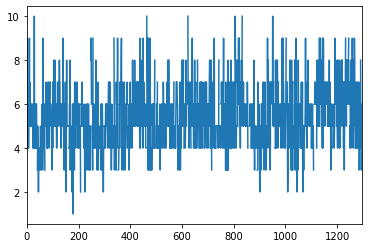

In [130]:
df['match_len'].plot()

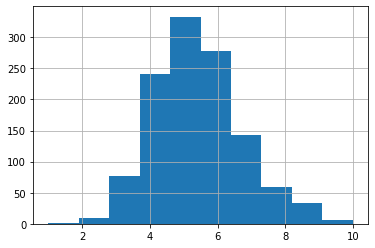

In [131]:
df['match_len'].hist()